## Example 1: Without Activation Function (Linear Model)

a. We’ll generate synthetic data (points that fall into two categories, similar to pizza/pasta lovers).

b We’ll train a simple neural network with one hidden layer (using linear transformation without an activation function in one case, and with an activation function in the other).

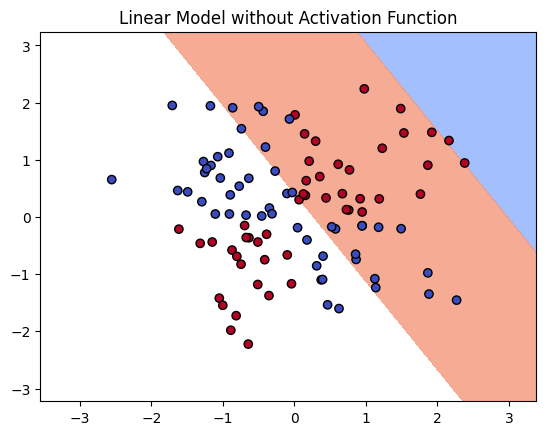

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
n_samples = 100
X = np.random.randn(n_samples, 2)
y = np.array(X[:, 0] * X[:, 1] > 0, dtype=int)  # Non-linear relationship

# Linear Model (without activation function)
def linear_model(X, weights, bias):
    return np.dot(X, weights) + bias

# Initialize weights and bias
weights = np.random.randn(2, 1)  # Two features, one neuron
bias = np.random.randn(1)

# Predictions
y_pred_linear = linear_model(X, weights, bias)

# Convert predictions to 0/1 by applying threshold
y_pred_linear_class = (y_pred_linear > 0).astype(int)

# Plot the decision boundary
def plot_decision_boundary(X, weights, bias, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = linear_model(np.c_[xx.ravel(), yy.ravel()], weights, bias)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap='coolwarm', alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.show()

plot_decision_boundary(X, weights, bias, title="Linear Model without Activation Function")


What’s happening here:

a. The model tries to separate the points using only a linear transformation (no activation function).

b Since the data follows a non-linear relationship, the model struggles to find a good boundary between the classes.

## Example 2: With Activation Function (Non-Linear Model)

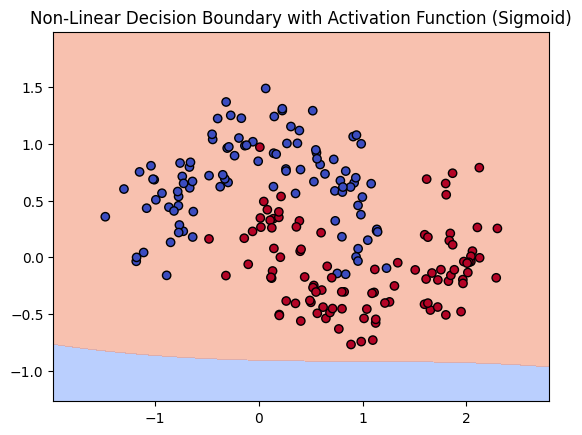

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate a non-linear dataset (two interleaving half circles)
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
y = y.reshape(-1, 1)  # Reshape y to be a column vector

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Neural Network Model with 1 hidden layer
def forward_pass(X, W1, b1, W2, b2):
    # First layer (Hidden layer)
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)  # Activation function (Sigmoid)

    # Output layer
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)  # Activation function for binary classification
    return a2

# Initialize weights and biases
np.random.seed(42)
input_dim = 2    # Two input features (X1, X2)
hidden_dim = 3   # Three neurons in the hidden layer
output_dim = 1   # One output (binary classification)

# Randomly initialize the weights and biases
W1 = np.random.randn(input_dim, hidden_dim)
b1 = np.random.randn(1, hidden_dim)
W2 = np.random.randn(hidden_dim, output_dim)
b2 = np.random.randn(1, output_dim)

# Predictions using neural network
y_pred = forward_pass(X, W1, b1, W2, b2)
y_pred_class = (y_pred > 0.5).astype(int)

# Plot the decision boundary for the neural network
def plot_decision_boundary(X, y, W1, b1, W2, b2):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = forward_pass(np.c_[xx.ravel(), yy.ravel()], W1, b1, W2, b2)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='coolwarm', edgecolors='k')
    plt.title("Non-Linear Decision Boundary with Activation Function (Sigmoid)")
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, W1, b1, W2, b2)
